# Sub-Audible FFT Coefficients

This is a quick notebook to gain some intuition about the role of sub-audible FFT coefficients in longer FFT transforms (i.e., ~one second, rather than the ~20 milliseconds usually used for the lapped, short-time FFT transform).

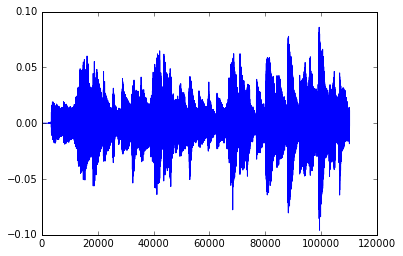

In [43]:
%matplotlib inline
from IPython.display import display, Audio
from matplotlib import pyplot as plt
import zounds
from zounds.soundfile import resample
from zounds.spectral import fft

samples = zounds.AudioSamples.from_file('../audio/bach.ogg')
samples = samples[:zounds.Seconds(10)]
samples = resample(samples.mono, zounds.SR11025())
plt.plot(samples)
Audio(samples, rate=int(samples.samplerate))

Let's take the FFT of the entire 10-second sample, and have a peek at the coefficients.

(FrequencyDimension(scale=LinearScale(band=FrequencyBand(
 start_hz=0,
 stop_hz=5512,
 center=2756.0,
 bandwidth=5512), n_bands=55126)),)

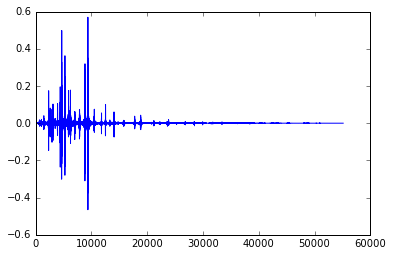

In [44]:
coeffs = fft(samples)
display(coeffs.dimensions)
plt.plot(coeffs.real)

How many of those coefficients are below the range of frequencies that we perceive as tones?

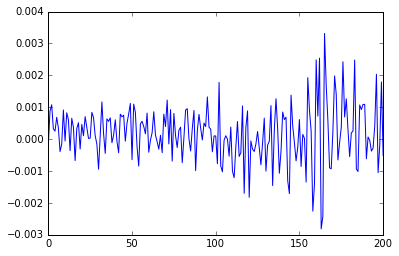

In [45]:
sub_tonal = coeffs[:zounds.Hertz(20)]
plt.plot(sub_tonal.real)

So, just out of curiousity, what happens when we remove those coefficients?

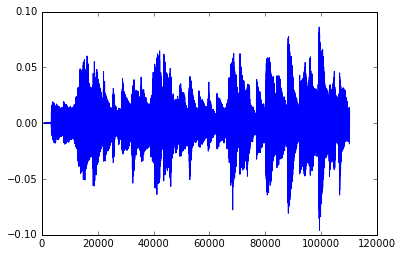

In [46]:
import numpy as np

coeffs[:zounds.Hertz(20)] = 0

reconstruction = zounds.AudioSamples(
    np.fft.irfft(coeffs, norm='ortho'), zounds.SR11025())
plt.plot(reconstruction)
Audio(reconstruction, rate=int(reconstruction.samplerate))

Apparently, absolutely nothing changes at all about the audio.  Let's try some percussive sounds too.

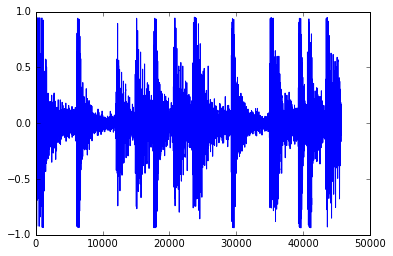

In [47]:
samples = zounds.AudioSamples.from_file('../audio/lovedrops.wav')
samples = resample(samples.mono, zounds.SR11025())
plt.plot(samples)
Audio(samples, rate=int(samples.samplerate))

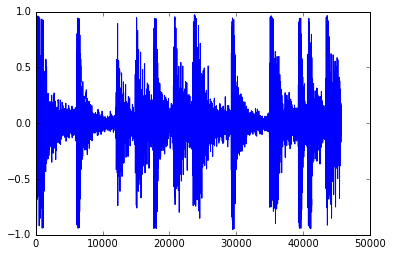

In [48]:
coeffs = fft(samples)
coeffs[:zounds.Hertz(20)] = 0
reconstruction = zounds.AudioSamples(
    np.fft.irfft(coeffs, norm='ortho'), zounds.SR11025())
plt.plot(reconstruction)
Audio(reconstruction, rate=int(reconstruction.samplerate))

I was under the mistaken impression that those coefficients for sub-tonal frequencies contributed to the larger scale structure/modulation of the sound, but that doesn't seem to be the case at all.  Whenever working with longer FFT transforms, it's safe to ignore those coefficients entirely, both when doing analysis and synthesis, as they contribute nothing audible to the sound.